In [1]:
import os.path
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import factorial
from scipy.stats import poisson
import time

plt.close("all")

def mh_poisson_basic(n, lambda_par):
    bernoulli_samples = (np.random.rand(n) > 0.5).astype(int)
    unif_samples = np.random.rand(n)
    realization = np.zeros(n)
    x = 0
    for ind in range(1,n):
        if bernoulli_samples[ind] == 0:
            if x == 0:
                x = 0
            elif unif_samples[ind] <  np.true_divide( x, lambda_par):
                x = x - 1
        else:
            if unif_samples[ind] <  np.true_divide( lambda_par, x + 1):
                x = x + 1
        realization[ind] = x
    return realization

def mh_poisson_extended(n, lambda_par,m):
    aa_milne_arr = [0, 1, 2, 3]
    bernoulli_samples = np.random.choice(aa_milne_arr, n, p=[0.25,0.25,0.25,0.25])
    unif_samples = np.random.rand(n)
    realization = np.zeros(n)
    x = 0
    for ind in range(1,n):
        if bernoulli_samples[ind] == 0:
            if x == 0:
                x = 0
            elif unif_samples[ind] <  np.true_divide( x, lambda_par):
                x = x - 1
        if bernoulli_samples[ind] == 1:
            if unif_samples[ind] <  np.true_divide( lambda_par, x + 1):
                x = x + 1
        if bernoulli_samples[ind] == 2:
            if unif_samples[ind] <  np.true_divide(lambda_par**(x+m),factorial(x+m)/factorial(x)):
                x = x + m
        if bernoulli_samples[ind] == 3:
        	if x <= m:
        		x = x
        	elif unif_samples[ind] <  np.true_divide(factorial(x)/factorial(x-m),lambda_par**m):
        		x = x - m
        realization[ind] = x
    return realization


n = 200
n_tries = 10000
m=5

# Poisson parameter
lambda_par = 40

# True pmf
aux_ind = np.arange(25,41,5)
poisson_pmf = poisson.pmf(aux_ind, lambda_par)
np.true_divide( np.exp(-lambda_par) * lambda_par ** aux_ind , factorial(aux_ind))

# Empirical pmf obtained by Metropolis Hastings
empirical_pmf_basic_aux = np.zeros((len(aux_ind),n))
empirical_pmf_extended_aux = np.zeros((len(aux_ind),n))
start_time = time.time()
for i_try in range(n_tries):
    realization_basic = mh_poisson_basic(n,lambda_par)
    realization_extended = mh_poisson_extended(n,lambda_par,m)
    for ind in range(len(aux_ind)):
        empirical_pmf_basic_aux[ind,:] = empirical_pmf_basic_aux[ind,:] + (realization_basic == aux_ind[ind]).astype(int)
        empirical_pmf_extended_aux[ind,:] = empirical_pmf_extended_aux[ind,:] + (realization_extended == aux_ind[ind]).astype(int)
    empirical_pmf_basic = np.true_divide(empirical_pmf_basic_aux, n_tries)
    empirical_pmf_extended = np.true_divide(empirical_pmf_extended_aux, n_tries)
print("--- %s seconds ---" % (time.time() - start_time))

fig = plt.figure(figsize=(14, 7)) 
color_array = ['limegreen', 'purple', 'grey', 'steelblue', 'deepskyblue', 'tomato',
               'maroon','darkgray','darkorange', 'steelblue', 'forestgreen', 'silver']
for ind in range(len(aux_ind)):
    plt.plot([1,n],[poisson_pmf[ind],poisson_pmf[ind]],'--',lw=2, color=color_array[ind])
    plt.plot(np.arange(n),empirical_pmf_basic[ind,:],lw=2, color=color_array[ind], label=str(aux_ind[ind]))    
plt.legend(fontsize=18)
plt.xticks(fontsize=18) 
plt.yticks(fontsize=18)
plt.ylabel("Distribution", fontsize=22,labelpad=10)  
plt.xlabel("Iterations", fontsize=22,labelpad=10)  
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('metropolis_hastings_poisson_basic.pdf')

fig = plt.figure(figsize=(14, 7)) 
for ind in range(len(aux_ind)):
    plt.plot([1,n],[poisson_pmf[ind],poisson_pmf[ind]],'--',lw=2, color=color_array[ind])
    plt.plot(np.arange(n),empirical_pmf_extended[ind,:],lw=2, color=color_array[ind], label=str(aux_ind[ind]))    
plt.legend(fontsize=18)
plt.xticks(fontsize=18) 
plt.yticks(fontsize=18)
plt.ylabel("Distribution", fontsize=22,labelpad=10)  
plt.xlabel("Iterations", fontsize=22,labelpad=10)  
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('metropolis_hastings_poisson_extended.pdf')

/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in true_divide


--- 29.56481409072876 seconds ---


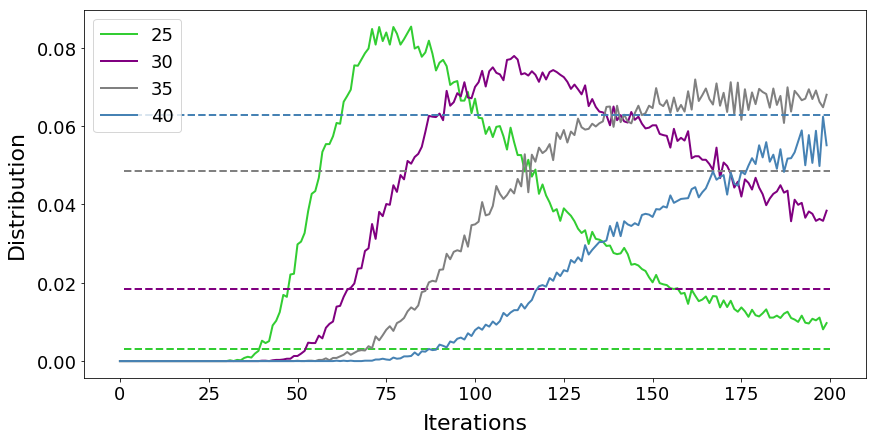

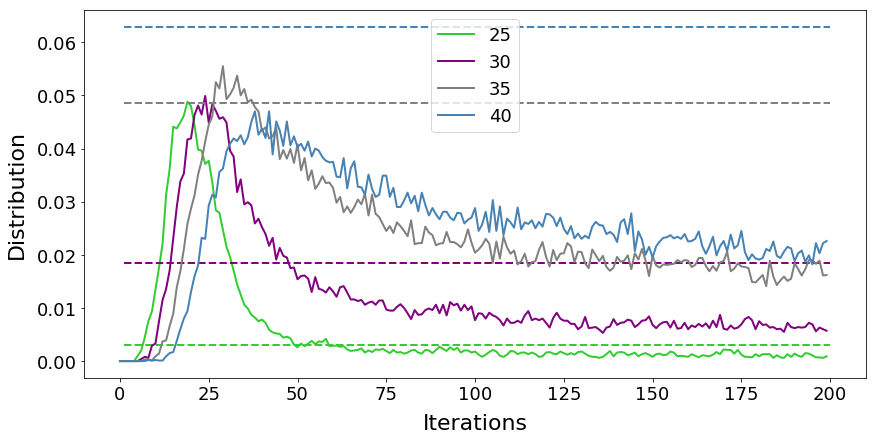

In [2]:
plt.show()